## Semi-parametric SIR

Author: Erik M Volz @emvolz

Date: 2018-10-02

R implementation of SDEs using the `pomp` library and Euler-Murayama algorithm. 

In [1]:
library(pomp)

In [2]:
set.seed( 1111 )

In [3]:
# Function to simulate one time step 
step_fun_R <- function(x, t, params, delta.t, ...){
    S <- x[1]
    I <- x[2] 
    R <- x[3]
    N <- S + I + R 
    logbeta <- x[4]
    beta <- exp(logbeta)

    gamma = params[1] 
    sigma = params[2] 
    alpha = params[3]

    newinf <- beta * S * I * delta.t/N
    newdeath <- gamma * I *delta.t 
    S <- max(0, S - newinf )
    I <- max(0, I + newinf - newdeath )
    R <- max(0, R + newdeath )
    logbeta <- logbeta + rnorm(1, -alpha * I * delta.t, sd = sigma * sqrt(delta.t) )
    c( S = unname(S) , I  = unname(I), R  = unname(R), logbeta = unname( logbeta ))
}

In [4]:
# Defines pomp object that could be used for simulation or inference 
spsir_pomp_R <- pomp ( rprocess = euler.sim( step.fun = step_fun_R, delta.t = .001)
 , t0 = 0
 , statenames = c( 'S', 'I', 'R', 'logbeta')
 , paramnames = c('gamma', 'sigma', 'alpha')
 , data = data.frame( time = seq(0, 10, by=.01), S = NA, I = NA, R = NA, logbeta = NA)
 , time = 'time'
 , initializer = function(params, t0, ... ) c( S = 50, I = 1, R = 0, logbeta = log(3) )
 , rmeasure = function( x, t, params, ... ) x 
)

### Simulation


In [5]:
spsir_pomp_R_sol <- simulate(spsir_pomp_R, params = c( gamma = 1, sigma = 1, alpha =  0.1) )

### Visualization


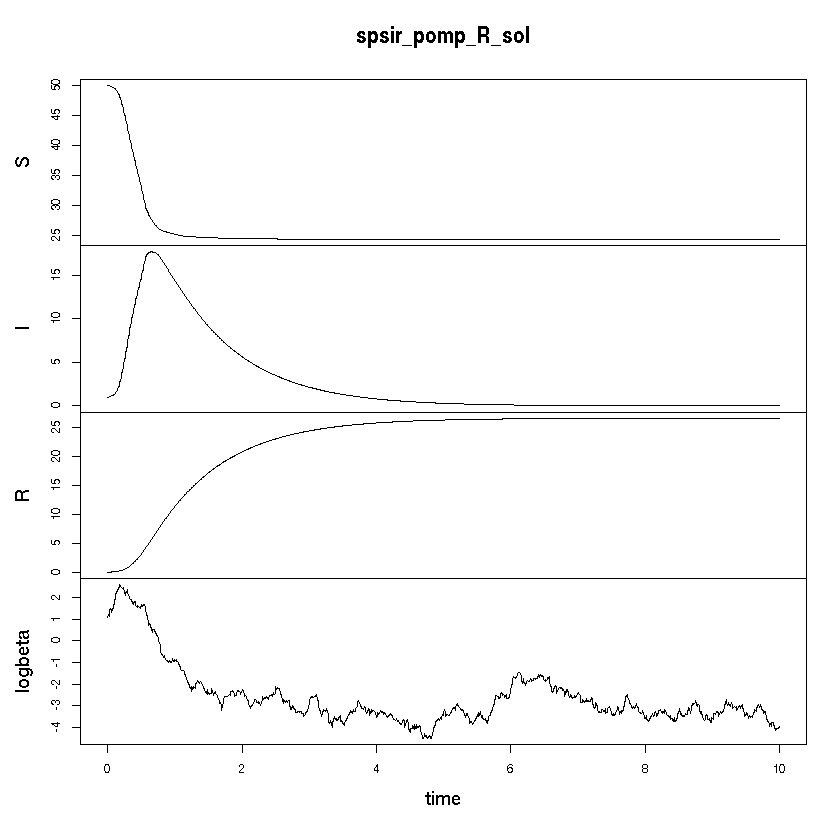

In [6]:
plot( spsir_pomp_R_sol )